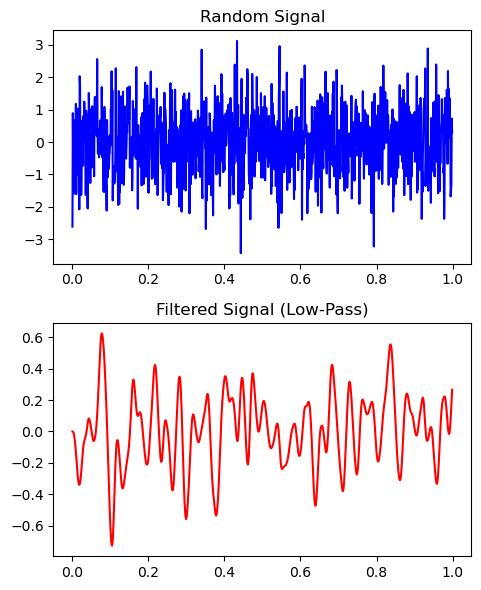

In [6]:
#----- Low pass example -------------
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Step 1: Generate a random signal
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second duration)
random_signal = np.random.normal(0, 1, len(t))  # Generate a random signal

# Step 2: Define a low-pass filter
cutoff_frequency = 30  # Cutoff frequency for the low-pass filter (Hz)
nyquist = 0.5 * fs
normal_cutoff = cutoff_frequency / nyquist
b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)

# Step 3: Filter the random signal
filtered_signal = signal.lfilter(b, a, random_signal)

# Step 4: Plot the original and filtered signals
plt.figure(figsize=(5, 6))
plt.subplot(2, 1, 1)
plt.plot(t, random_signal, 'b-', label='Original Signal')
plt.title('Random Signal')
#plt.grid()
#plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, 'r-', label='Filtered Signal')
plt.title('Filtered Signal (Low-Pass)')
#plt.grid()
#plt.legend()

plt.tight_layout()
plt.show()


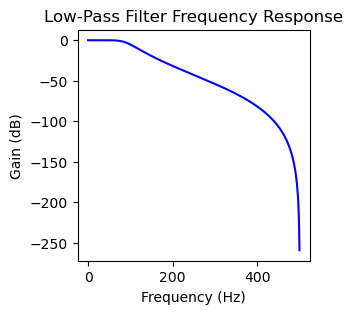

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the parameters of the low-pass filter
cutoff_frequency = 90  # Cutoff frequency in Hz
sampling_frequency = 1000  # Sampling frequency in Hz

# Create a time vector for the frequency response plot
t = np.linspace(0, 1, 1000, endpoint=False)

# Create the low-pass filter using a Butterworth filter design
nyquist = 0.5 * sampling_frequency
normal_cutoff = cutoff_frequency / nyquist
b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)

# Compute the frequency response of the filter
w, h = signal.freqz(b, a, worN=800)

# Plot the frequency response
plt.figure(figsize=(3, 3))
plt.plot(0.5 * sampling_frequency * w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.title("Low-Pass Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
#plt.grid(True)
plt.show()


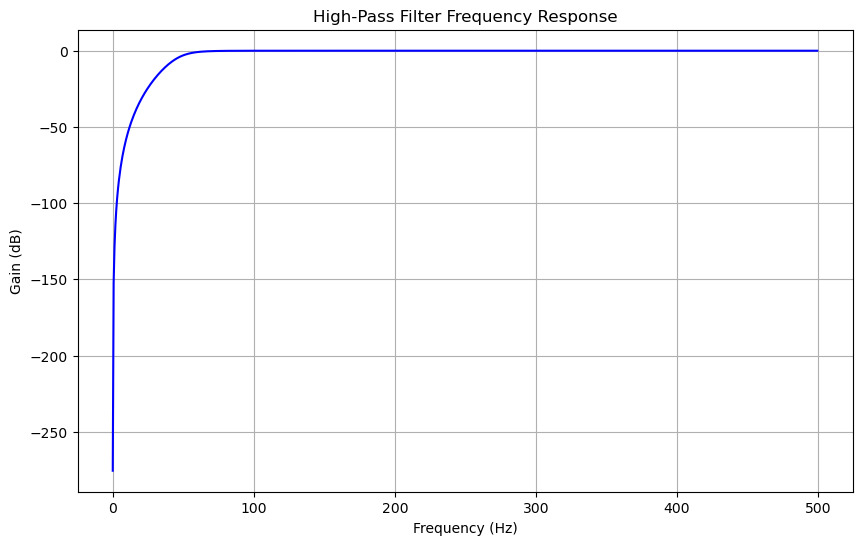

In [18]:
#------ High pass example ---------
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the parameters of the high-pass filter
cutoff_frequency = 50  # Cutoff frequency in Hz
sampling_frequency = 1000  # Sampling frequency in Hz

# Create a time vector for the frequency response plot
t = np.linspace(0, 1, 1000, endpoint=False)

# Create the high-pass filter using a Butterworth filter design
nyquist = 0.5 * sampling_frequency
normal_cutoff = cutoff_frequency / nyquist
b, a = signal.butter(4, normal_cutoff, btype='high', analog=False)

# Compute the frequency response of the filter
w, h = signal.freqz(b, a, worN=800)

# Plot the frequency response
plt.figure(figsize=(10, 6))
plt.plot(0.5 * sampling_frequency * w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.title("High-Pass Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.grid(True)
plt.show()


In [23]:
!pip install scipy

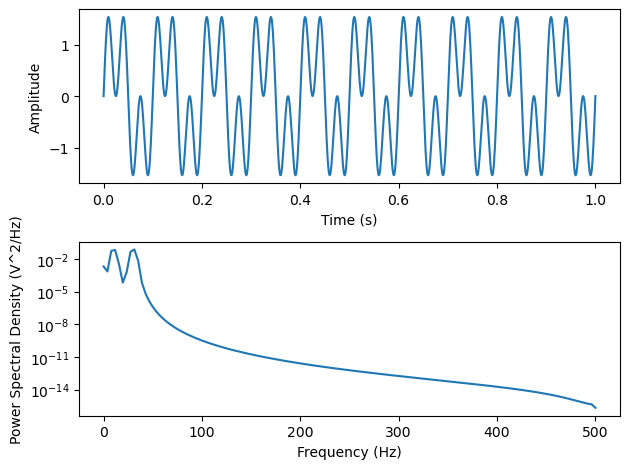

In [3]:
#-------- PSD calculation --------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Generate a test signal
fs = 1000
t = np.linspace(0, 1, fs)
signal = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*30*t) 

# Compute PSD
f, psd = welch(signal, fs=fs) 

# Plot signal
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot PSD
plt.subplot(2, 1, 2)
plt.semilogy(f, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')

plt.tight_layout()
plt.show()


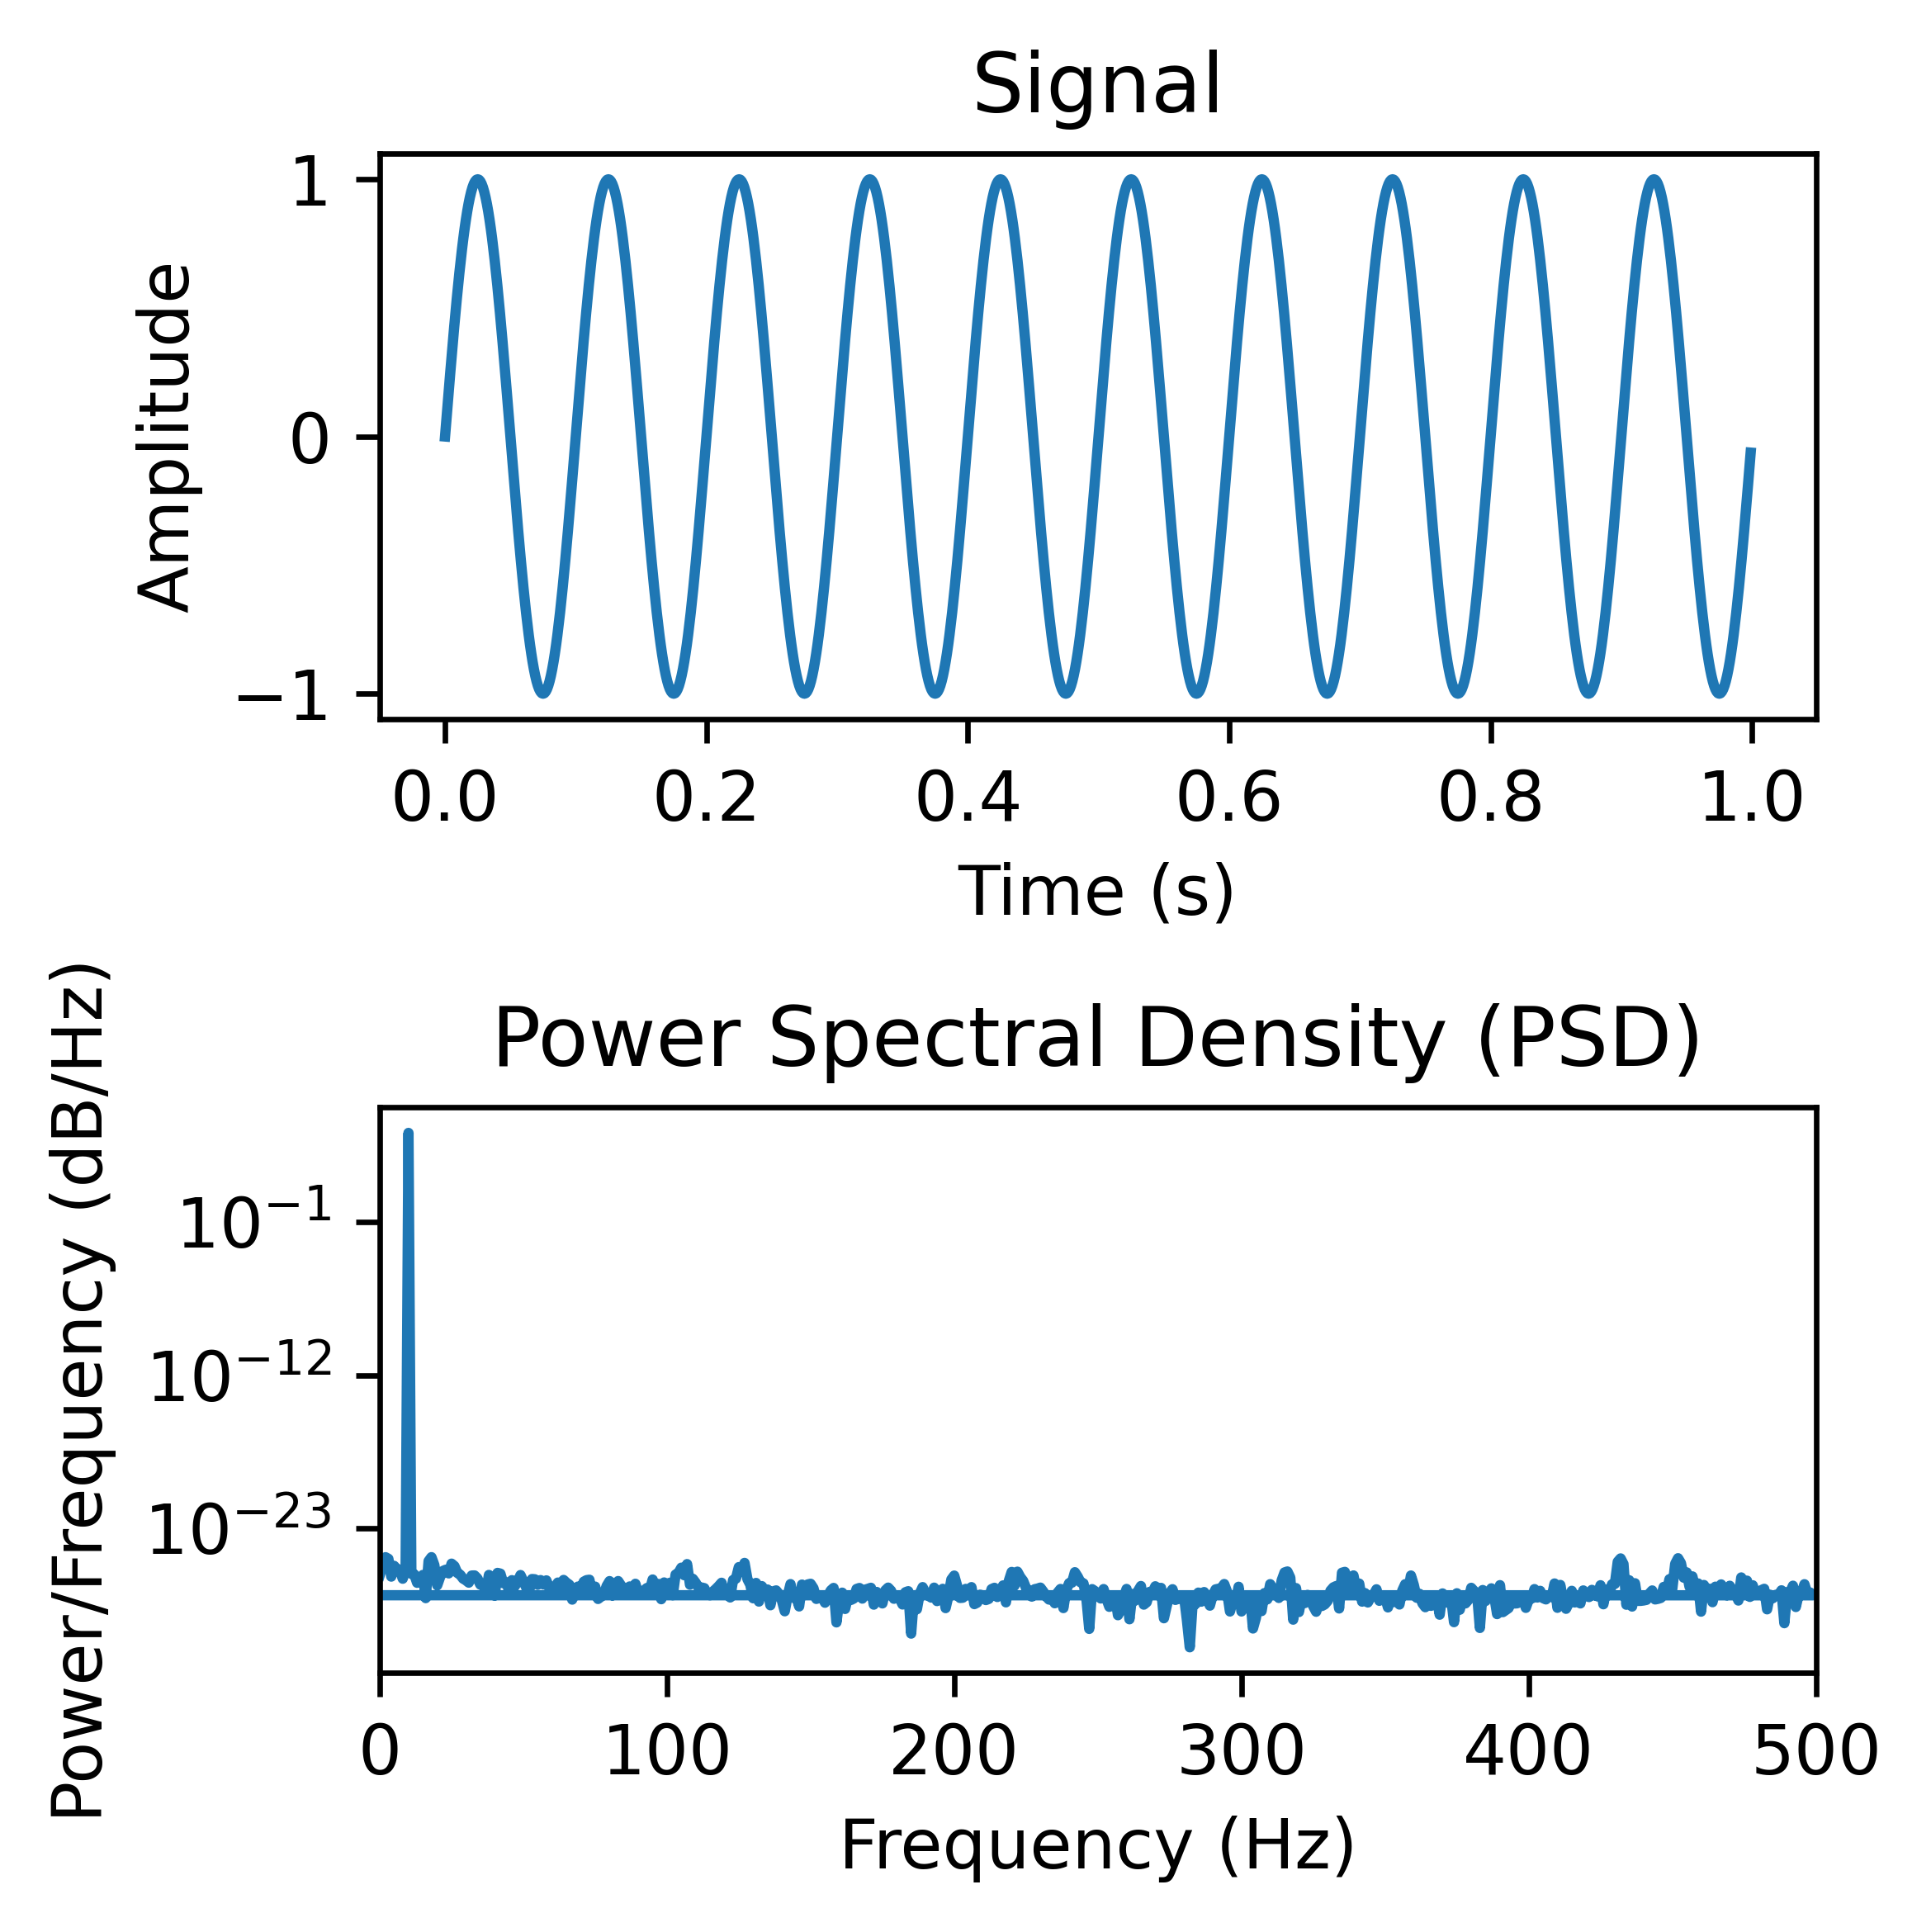

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
# Define parameters
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector from 0 to 1 second
f = 10  # Frequency of the sine wave in Hz
signal = np.sin(2 * np.pi * f * t)  # Generate a simple sine wave

# Compute the PSD using FFT
frequencies = np.fft.fftfreq(len(signal), 1/fs)
psd = np.abs(np.fft.fft(signal))**2

# Plot the signal
plt.figure(figsize=(4, 4))
plt.subplot(2, 1, 1)  # Create a subplot for the signal
plt.plot(t, signal)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
#plt.grid(True)

# Plot the PSD
plt.subplot(2, 1, 2)  # Create a subplot for the PSD
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
#plt.grid(True)
plt.xlim(0, fs/2)  # Show only positive frequencies (Nyquist limit)

# Adjust subplots for better layout
plt.tight_layout()

# Show both plots
plt.show()


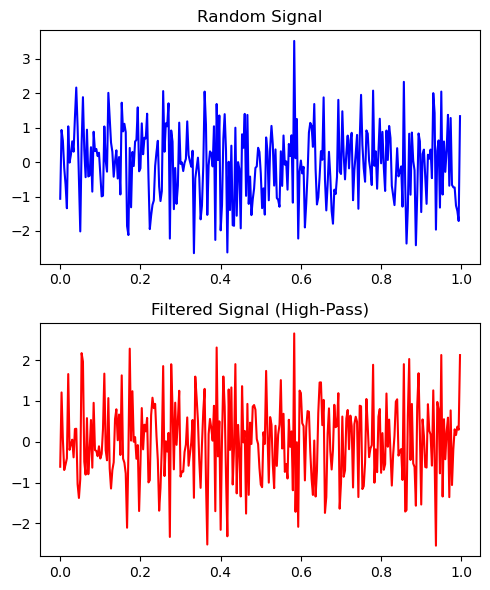

In [34]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Generate a random signal
fs = 300  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second duration)
random_signal = np.random.normal(0, 1, len(t))  # Generate a random signal

# Define the parameters for the high-pass filter
cutoff_frequency = 20  # Cutoff frequency for the high-pass filter (Hz)
nyquist = 0.5 * fs
normal_cutoff = cutoff_frequency / nyquist
b, a = signal.butter(4, normal_cutoff, btype='high', analog=False)

# Filter the random signal
filtered_signal = signal.lfilter(b, a, random_signal)

# Plot the original and filtered signals
plt.figure(figsize=(5, 6))
plt.subplot(2, 1, 1)
plt.plot(t, random_signal, 'b-', label='Original Signal')
plt.title('Random Signal')
#plt.grid()
#plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, 'r-', label='Filtered Signal (High-Pass)')
plt.title('Filtered Signal (High-Pass)')
#plt.grid()
#plt.legend()

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


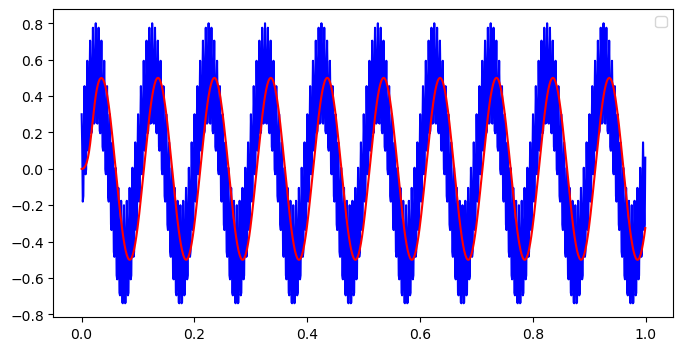

In [14]:
#------- Butterworth filter --------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter 


# Create test signal
fs = 1000 # Sampling frequency
T = 1 # Signal duration in seconds
t = np.linspace(0, T, T*fs, endpoint=False)
x = 0.5*np.sin(2*np.pi*10*t) + 0.3*np.cos(2*np.pi*200*t)

# Design butterworth filter 
cutoff_freq = 50 # Cutoff frequency
nyq_freq = fs/2.0
normal_cutoff = cutoff_freq / nyq_freq
b, a = butter(5, normal_cutoff, btype='low', analog=False)

# Apply filter
y = lfilter(b, a, x)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t, x, 'b-')
plt.plot(t, y, 'r-')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


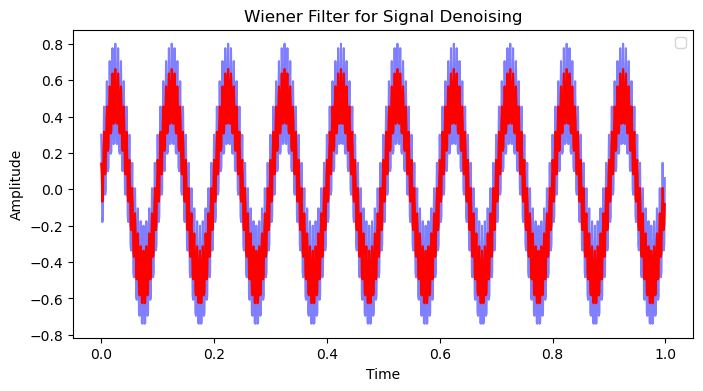

In [13]:
#------- Wiener filter --------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Create test signal
fs = 1000 # Sampling frequency
T = 1 # Signal duration in seconds
t = np.linspace(0, T, T*fs, endpoint=False)
x = 0.5*np.sin(2*np.pi*10*t) + 0.3*np.cos(2*np.pi*200*t)


# Apply the Wiener filter to the noisy signal
filtered_signal = wiener(x)

# Plot the original signal, noisy signal, and filtered signal
plt.figure(figsize=(8, 4))
#plt.plot(t, original_signal, label='Original Signal', color='blue')
plt.plot(t, x, color='blue', alpha=0.5)
plt.plot(t, filtered_signal, color='red')

plt.title('Wiener Filter for Signal Denoising')
plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.grid(True)
plt.legend()
plt.show()



In [2]:
!pip install pykalman

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48444 sha256=b075b83ca9f2e30dbdc4d12bb86076f1c45fff0eced52c05f7c9c90a289c123d
  Stored in directory: /Users/reza/Library/Caches/pip/wheels/05/c8/d9/6f343bfea436aa40ad725f7815e3e735b5b42518fded200cd2
Successfully built pykalman


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


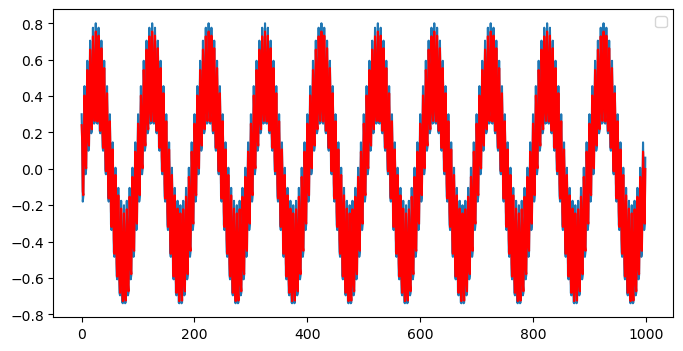

In [12]:
#---- Kalman filter --------
import numpy as np
from pykalman import KalmanFilter

# Plot results
import matplotlib.pyplot as plt

# Create test signal

# Create test signal
fs = 1000 # Sampling frequency
T = 1 # Signal duration in seconds
t = np.linspace(0, T, T*fs, endpoint=False)
observations = 0.5*np.sin(2*np.pi*10*t) + 0.3*np.cos(2*np.pi*200*t)


# Create Kalman Filter
kf = KalmanFilter(transition_matrices = [[1]], 
                  observation_matrices = [[1]],  
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=0.5**2)
                  
# Use Kalman Filter to estimate state
state_means, state_covariances = kf.filter(observations)

plt.figure(figsize=(8, 4))

plt.plot(observations, )
plt.plot(state_means, c='red')
plt.legend()
plt.show()